# MoSDeF: A Molecular Simulation and Design Framework

The Molecular Simulation and Design Framework (MoSDeF) is a collection of open-source tools ([hosted on Github](https://github.com/mosdef-hub)) aimed at facilitating the construction and simulation of complex molecular systems - with a particular focus on the automated screening of large structural parameter spaces. All tools are written as Python packages and feature a Python-based API.

## Advanced mBuild routines

Now that we've explored the basics of how to create and connect mBuild `Compounds`, we'll look at some more advanced functionality to faciliate the construction of more relevant molecular systems.

### Importing mBuild

Again, we'll import mBuild along with a visualization routine.

In [1]:
%matplotlib notebook
from visualize import visualize
import mbuild as mb

### Creating polymers

In the previous tutorial we finished up by creating a class for constructing a linear alkane chain. One could imagine that the same approach we took to create this class (i.e. successively adding CH2 units) could be further generalized to support the creation of any linear polymer. In fact, mBuild contains a class that does just this, `mbuild.Polymer`.

Here, we'll explore how `Polymer` works by creating a PEG (polyethylene glycol) molecule. We first need to define classes for our CH2 and oxygen monomer units.

In [2]:
class CH2(mb.Compound):
    def __init__(self):
        super(CH2, self).__init__()
        
        mb.load('ch2.pdb', compound=self)
        carbon = list(self.particles_by_name('C'))[0]
        up_port = mb.Port(anchor=carbon, orientation=[0, 0, 1], separation=0.075)
        down_port = mb.Port(anchor=carbon, orientation=[0, 0, -1], separation=0.075)
        self.add(up_port, label='up')
        self.add(down_port, label='down')

class O(mb.Compound):
    def __init__(self):
        super(O, self).__init__()
        
        self.add(mb.Particle(name='O'))
        up_port = mb.Port(anchor=self[0], orientation=[0, 0, 1], separation=0.075)
        self.add(up_port, 'up')
        down_port = mb.Port(anchor=self[0], orientation=[0, 0, -1], separation=0.075)
        self.add(down_port, 'down')

We'll now feed instances of these two monomer to the `monomers` argument of `Polymer`. We also need to provide a few additional arguments. One of these is the `sequence` which is provided as a string of characters where each unique character represents one repetition of a monomer. Here, `AAB` means that we want two `CH2`'s for each `O`. We can use the `n` argument to specify the number of times the sequence should be replicated. The `port_labels` argument tells mBuild the names of the two `Ports` to connect when stitching together the polymer.

<IPython.core.display.Javascript object>


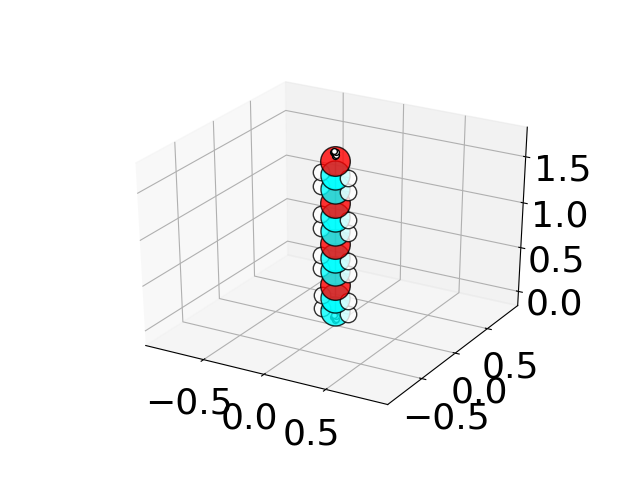

In [3]:
peg4 = mb.Polymer(monomers=(CH2(), O()), sequence='AAB', n=4, port_labels=('up', 'down'))
visualize(peg4)

### Energy minimization

By this point you have likely noticed that the geometries of some of the molecules we've created may not look entirely realistic (e.g. all backbone atoms featuring 180 degree angles in our PEG molecule). However, this is easily resolved through a simple energy minimization using whichever simulation engine you prefer. Additionally, mBuild features a basic energy minimization routine (through the Open Babel toolkit) that can be used to yield more realistic geometries for your prototypes.

In [4]:
peg4.xyz

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -1.09999999e-01,   0.00000000e+00,   0.00000000e+00],
       [  1.09999999e-01,   0.00000000e+00,   0.00000000e+00],
       [ -7.89299182e-18,  -2.28983499e-17,   1.50000000e-01],
       [  1.09999999e-01,   1.98452363e-17,   1.50000000e-01],
       [ -1.09999999e-01,  -6.56419361e-17,   1.50000000e-01],
       [ -2.77122075e-17,  -5.59448321e-17,   3.00000000e-01],
       [ -4.90059382e-17,  -1.07986536e-16,   4.50000000e-01],
       [  1.09999999e-01,   2.02442223e-17,   4.50000000e-01],
       [ -1.09999999e-01,  -2.36217295e-16,   4.50000000e-01],
       [ -7.87998139e-17,  -1.22558214e-16,   6.00000000e-01],
       [ -1.09999999e-01,  -3.05745012e-16,   6.00000000e-01],
       [  1.09999999e-01,   6.06285845e-17,   6.00000000e-01],
       [ -6.07153217e-17,  -4.73145828e-17,   7.50000000e-01],
       [  2.62810607e-17,   6.28837260e-17,   9.00000000e-01],
       [ -1.09999999e-01,  -1.75259111e-16,   9.0000000

In [5]:
peg4.energy_minimization()
peg4.xyz

/Users/summeraz/mbuild/mbuild/compound.py:1256: UserWarning: Performing energy minimization using the Open Babel package. Please refer to the documentation to find the appropriate citations for Open Babel and the UFF force field
  "Open Babel and the {} force field".format(forcefield))
/Users/summeraz/anaconda/envs/py3/lib/python3.5/site-packages/pandas/io/parsers.py:2108: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/summeraz/anaconda/envs/py3/lib/python3.5/site-packages/pandas/io/parsers.py:2110: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


array([[ -4.02999995e-03,  -1.72370002e-01,   2.90580004e-01],
       [  6.95999991e-03,  -1.61929995e-01,   1.80539995e-01],
       [  8.82000029e-02,  -2.18089998e-01,   3.32269996e-01],
       [ -2.83199996e-02,  -3.63800004e-02,   3.53599995e-01],
       [  5.95699996e-02,   2.81000007e-02,   3.30410004e-01],
       [ -1.20880000e-01,   5.72999986e-03,   3.08310002e-01],
       [ -4.46700007e-02,  -5.28500006e-02,   4.92780000e-01],
       [ -5.57399988e-02,   7.38999993e-02,   5.53990006e-01],
       [  4.13700007e-02,   1.28020003e-01,   5.48870027e-01],
       [ -1.35759994e-01,   1.34930000e-01,   5.06030023e-01],
       [ -9.48500037e-02,   5.61800003e-02,   7.00649977e-01],
       [ -1.93030000e-01,   4.49999981e-03,   7.05799997e-01],
       [ -1.10849999e-01,   1.55709997e-01,   7.48300016e-01],
       [  7.99999980e-05,  -2.35399995e-02,   7.69270003e-01],
       [  9.90699977e-02,   5.57699986e-02,   8.32379997e-01],
       [  1.22939996e-01,   1.48550004e-01,   7.7529001

<IPython.core.display.Javascript object>


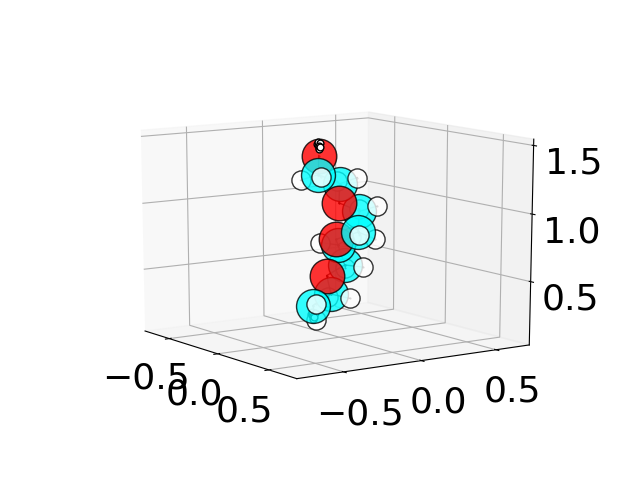

In [6]:
visualize(peg4)

### Packing boxes

A common routine used for setting up systems is the packing of boxes with some sort of molecule. mBuild features a `fill_box` routine designed around the PackMol utility to support this functionality.

To use the `fill_box` routine, we first need to define the dimensions of the box itself. mBuild features a basic `Box` class for defining orthogonal simulation boxes. Here we'll define a box with dimensions of 3nm x 3nm x 3nm.

In [7]:
box = mb.Box(lengths=[3, 3, 3])
box = mb.Box(mins=[-1.5, -1.5, -1.5], maxs=[1.5, 1.5, 1.5])
box

Box(mins=[-1.5 -1.5 -1.5], maxs=[ 1.5  1.5  1.5])

We'll now use the `fill_box` routine to place five PEG molecules into our box.

<IPython.core.display.Javascript object>


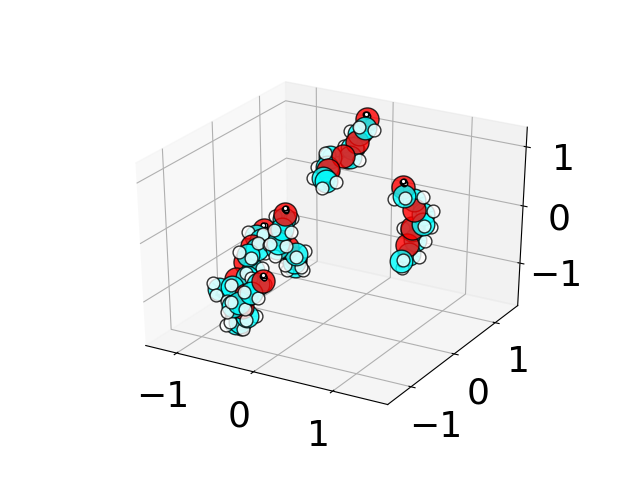

In [8]:
box = mb.fill_box(peg4, n_compounds=5, box=box)
visualize(box)

### Patterning

It's often useful to be able to specify the exact locations of where molecules should be placed. mBuild features a `Pattern` class that can be used to create sets of points for several common patterns including random and grid-like positions in both 2D and 3D, as well as uniform points on a sphere.

<IPython.core.display.Javascript object>


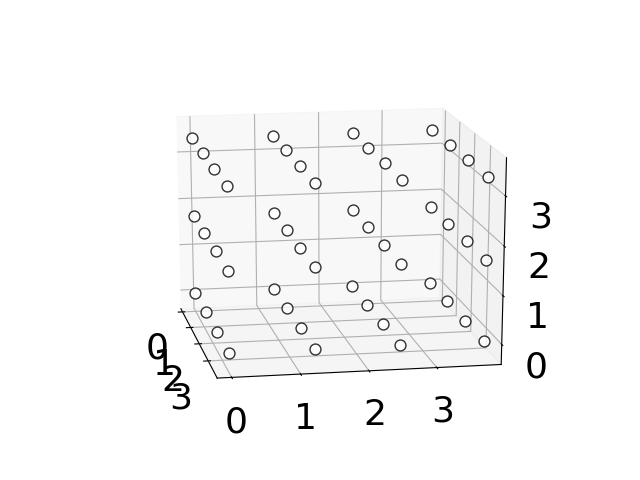

In [29]:
class LJ_particle(mb.Compound):
    def __init__(self, position):
        super(LJ_particle, self).__init__()
        lj_proto = mb.Particle(name='H', pos=position)
        self.add(lj_proto)

my_compound = mb.Compound()
grid3d = mb.Grid3DPattern(4, 4, 3)
grid3d.scale(5)
for position in grid3d:
    particle = LJ_particle(position)
    my_compound.add(particle)
visualize(my_compound)

<IPython.core.display.Javascript object>


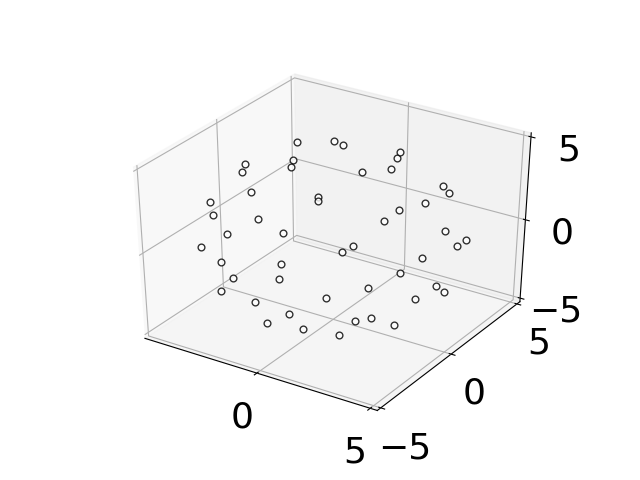

In [33]:
my_compound = mb.Compound()
sphere_pattern = mb.SpherePattern(50)
sphere_pattern.scale(5)
for position in sphere_pattern:
    particle = LJ_particle(position)
    my_compound.add(particle)
visualize(my_compound)

### Surface functionalization

Another common...

In [ ]:
from mbuild.lib.surfaces import Betacristobalite
surface = Betacristobalite()
chain_a = mb.Polymer(monomers=(CH2(), O()), n=4, sequence='AAB', port_labels=('up', 'down'))
chain_b = mb.Polymer(monomers=(CH2()), n=6, sequence='A', port_labels=('up', 'down'))
monolayer = mb.Monolayer(surface=surface, chains=(chain_a, chain_b), fractions=(0.25, 0.75))
visualize(monolayer)

### Saving molecular topologies